In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ ML/weather.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [8]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


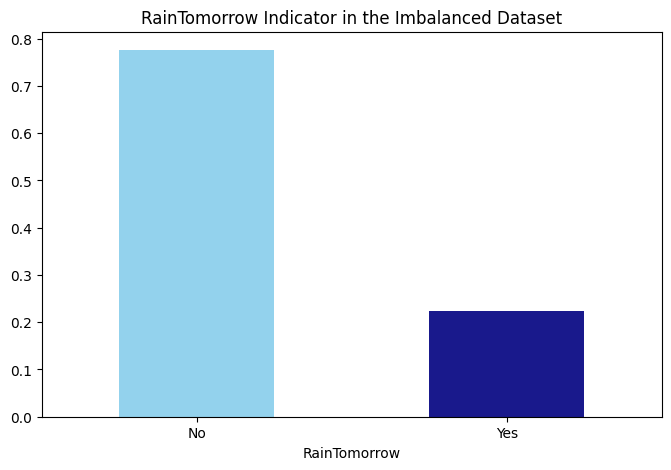

In [9]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator in the Imbalanced Dataset')
plt.show()

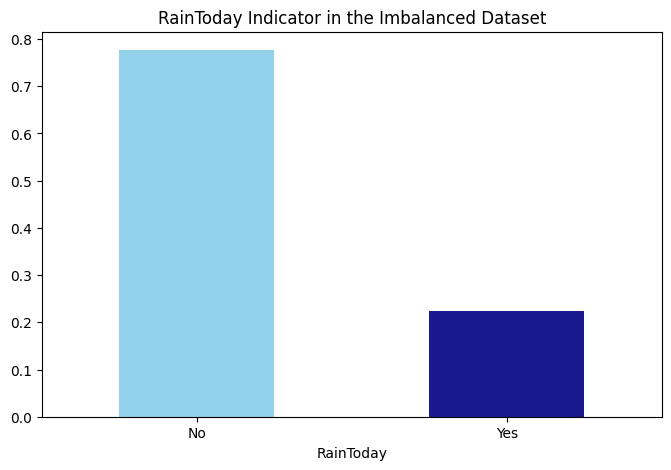

In [10]:
fig = plt.figure(figsize = (8,5))
df.RainToday.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainToday Indicator in the Imbalanced Dataset')
plt.show()

In [11]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

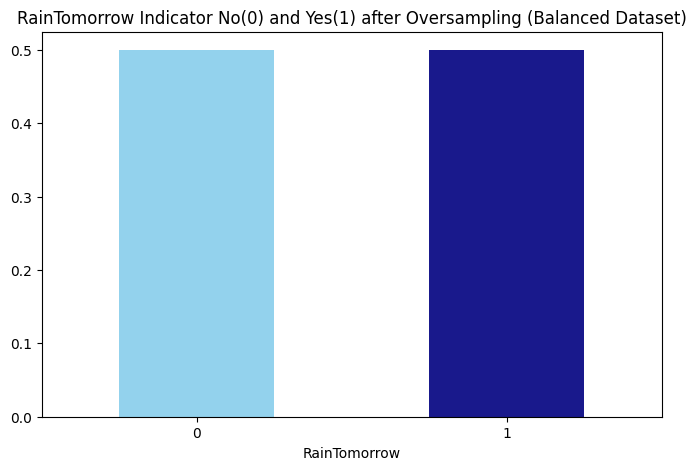

In [12]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=122)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [13]:
df.groupby('WindGustDir').mean(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
WindGustDir,,,,,,,,,,,,,,,,,,,
E,14.019193,26.320640,1.888080,6.327418,8.671598,37.650535,14.389417,16.903668,64.500111,46.258050,1019.230516,1016.039008,3.857393,3.881218,19.386679,24.894137,0.145576,2.083728,0.148826
ENE,14.559794,26.437389,1.886295,6.372801,8.642499,35.075701,12.787731,16.484936,66.403161,49.201809,1018.753785,1015.466323,3.835113,3.885129,19.895539,24.973666,0.149041,2.378791,0.161161
ESE,13.594965,25.392071,2.244837,6.243207,8.256357,37.377550,13.933452,17.365345,65.573582,47.652674,1019.385972,1016.525748,4.011594,4.049115,18.731991,23.907469,0.174075,2.166626,0.164271
N,10.838017,22.923200,1.440834,4.968339,6.746191,41.072733,15.414883,18.976829,68.986340,50.260397,1017.827404,1014.439218,4.678835,5.039424,15.938298,21.503938,0.155352,2.685431,0.271449
NE,14.627781,25.886364,1.639146,6.021475,8.505289,35.661190,12.078398,17.863127,67.699571,53.091743,1018.597480,1015.165605,3.873808,3.961772,19.848131,24.380431,0.132105,2.301091,0.186827
NNE,13.228104,24.797853,1.434432,5.481204,7.661323,37.580755,13.414589,18.210149,68.584499,53.206544,1018.320957,1014.721589,4.298617,4.537084,18.408940,23.252018,0.139987,2.631478,0.230219
NNW,10.077488,22.214083,1.792766,4.479302,6.922874,40.547173,12.826764,18.570556,71.146582,51.280309,1016.568598,1013.371954,4.675252,5.018052,15.107185,20.752911,0.194901,2.515043,0.283951
NW,10.412167,22.314461,2.242713,4.662266,7.178830,43.165688,13.504820,19.683769,69.910951,50.364951,1015.178095,1012.422255,4.641519,4.847449,15.486983,20.758228,0.230634,2.704073,0.285393
S,12.395112,22.202739,3.198995,5.544312,7.097909,40.736507,15.246835,19.588150,70.844000,55.214851,1018.769319,1017.213775,4.878856,4.740331,16.554044,20.589517,0.274072,2.798726,0.225388


In [14]:
pd.crosstab(df.WindGustDir, df.RainTomorrow)

RainTomorrow,0,1
WindGustDir,,
E,7721,1350
ENE,6704,1288
ESE,6105,1200
N,6581,2452
NE,5741,1319
NNE,4952,1481
NNW,4698,1863
NW,5719,2284
S,6932,2017


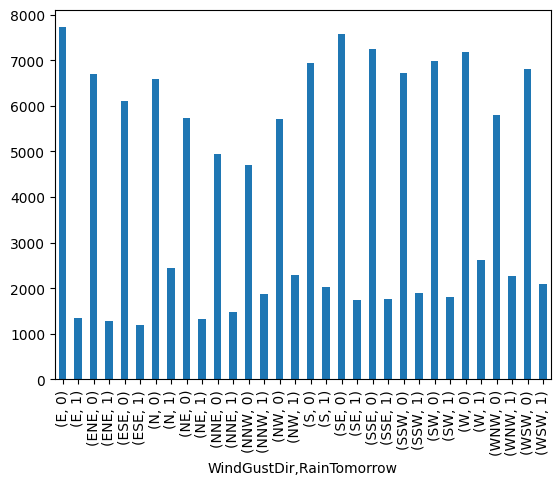

In [15]:
df.groupby('WindGustDir')['RainTomorrow'].value_counts().plot(kind='bar')
plt.show()

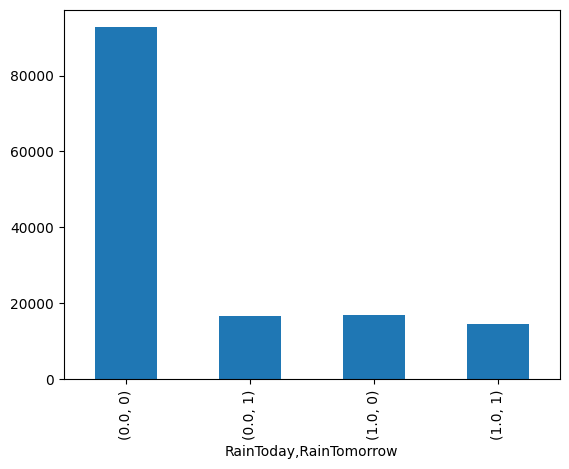

In [16]:
df.groupby('RainToday')['RainTomorrow'].value_counts().plot(kind='bar')
plt.show()

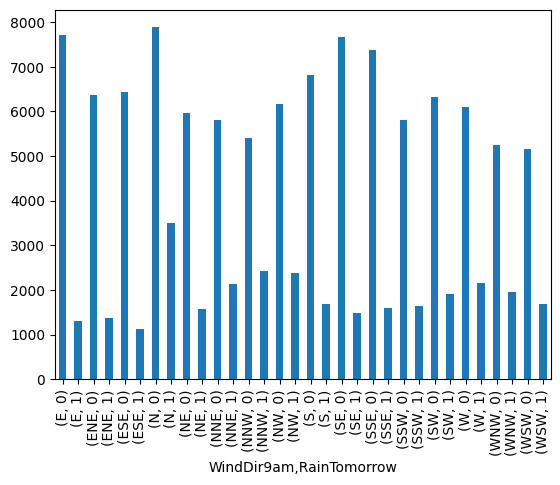

In [17]:
df.groupby('WindDir9am')['RainTomorrow'].value_counts().plot(kind='bar')
plt.show()

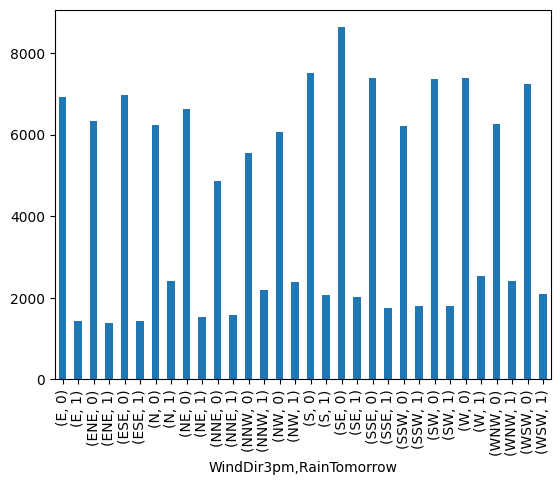

In [18]:
df.groupby('WindDir3pm')['RainTomorrow'].value_counts().plot(kind='bar')
plt.show()

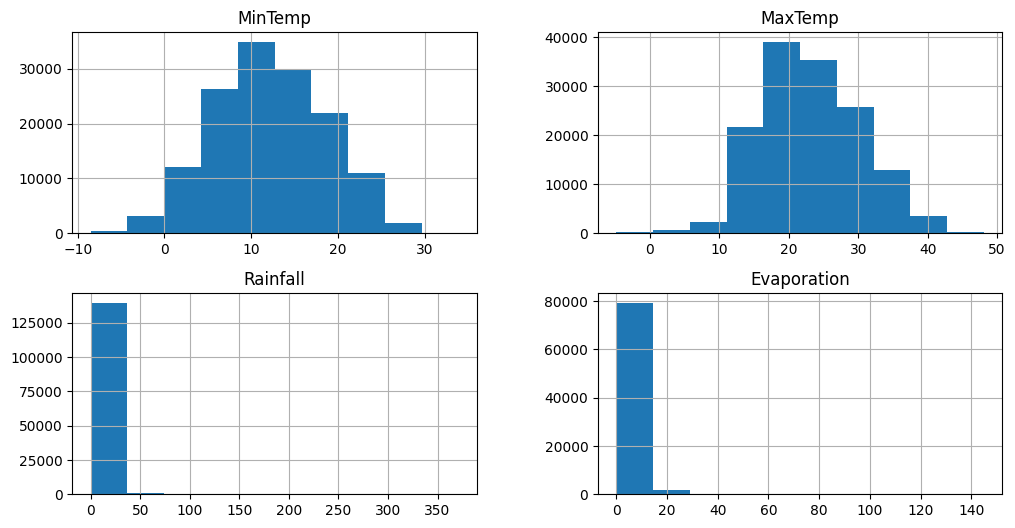

In [19]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation']].hist(figsize=(12,6))
plt.show()

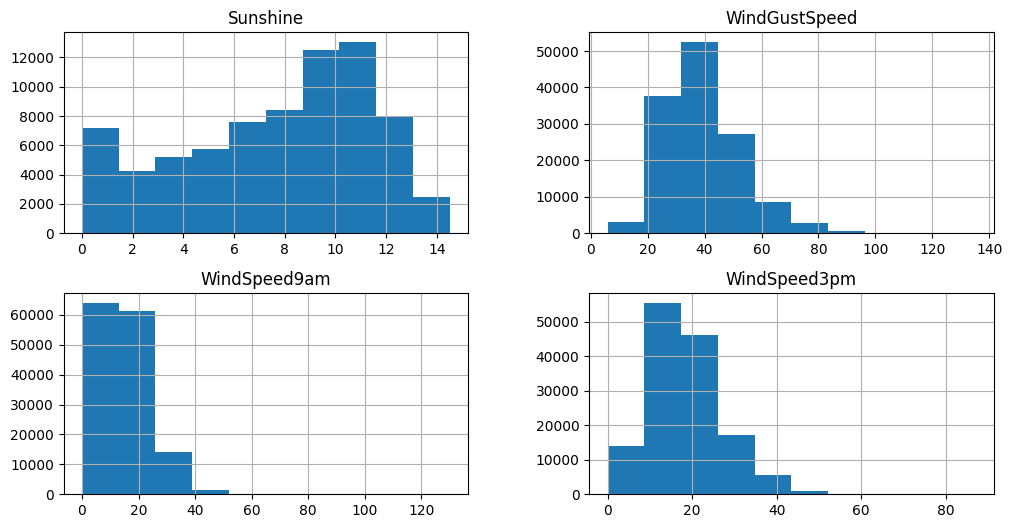

In [20]:
df[['Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm']].hist(figsize=(12,6))
plt.show()

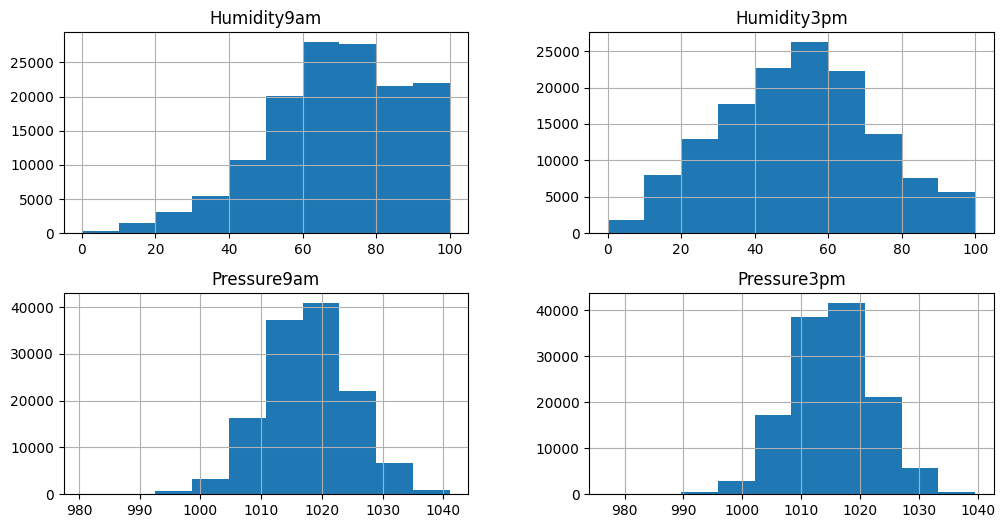

In [21]:
df[['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']].hist(figsize=(12,6))
plt.show()

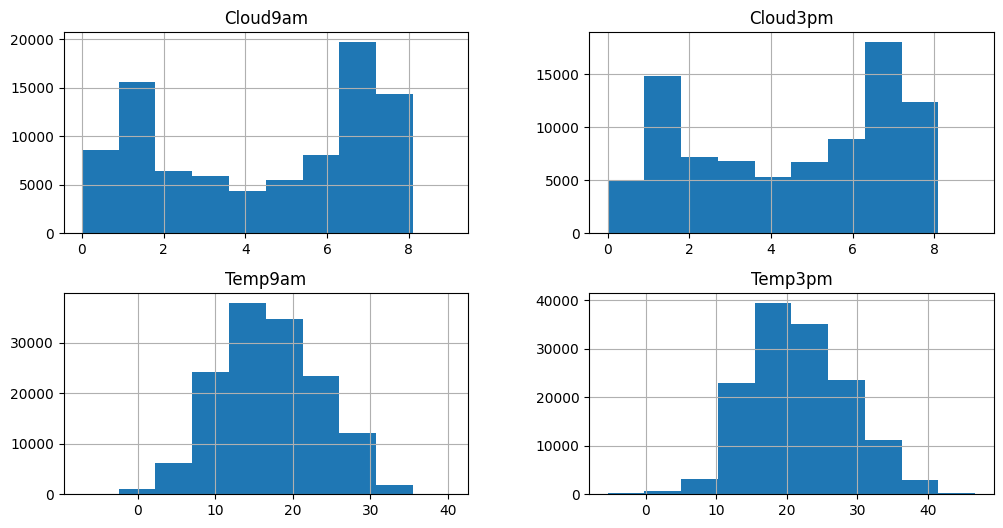

In [22]:
df[['Cloud9am','Cloud3pm','Temp9am','Temp3pm']].hist(figsize=(12,6))
plt.show()

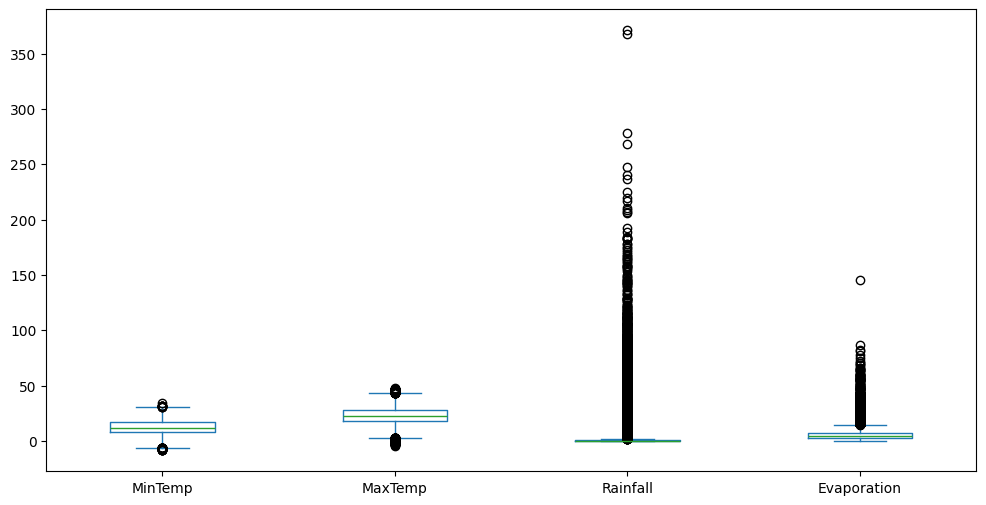

In [23]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation']].plot(kind='box',figsize=(12,6))
plt.show()

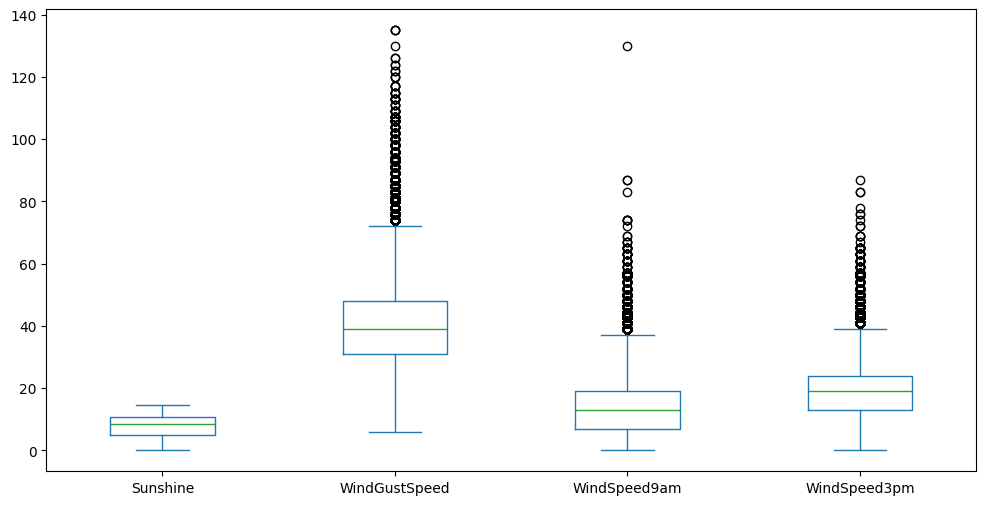

In [24]:
df[['Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm']].plot(kind='box',figsize=(12,6))
plt.show()

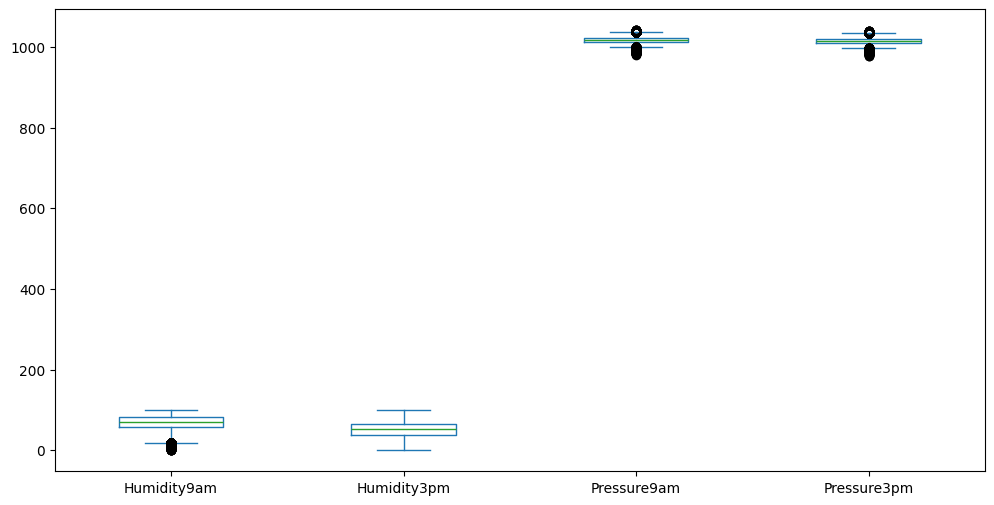

In [25]:
df[['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']].plot(kind='box',figsize=(12,6))
plt.show()

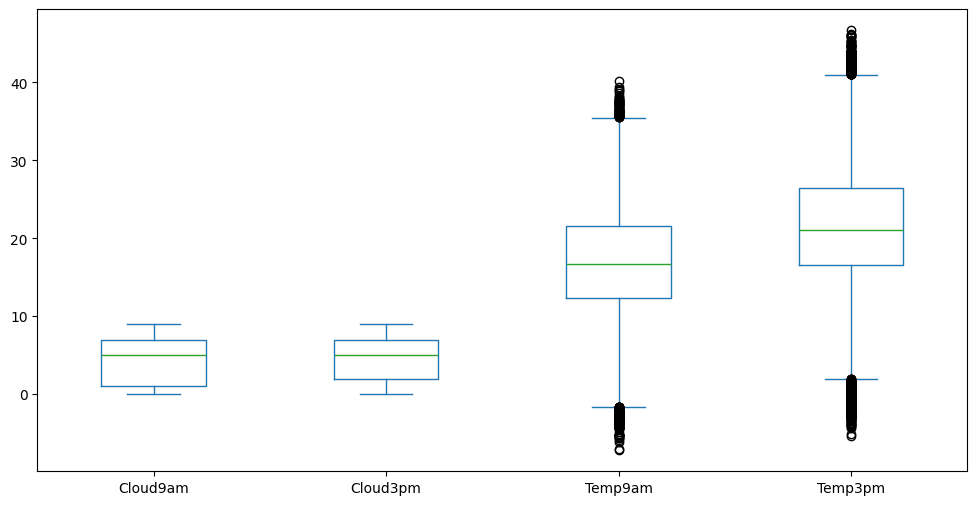

In [26]:
df[['Cloud9am','Cloud3pm','Temp9am','Temp3pm']].plot(kind='box',figsize=(12,6))
plt.show()

In [27]:
oversampled.isnull().sum()

,0
Date,0
Location,0
MinTemp,1056
MaxTemp,467
Rainfall,3072
Evaporation,95154
Sunshine,104622
WindGustDir,15363
WindGustSpeed,15258
WindDir9am,14732


<Axes: >

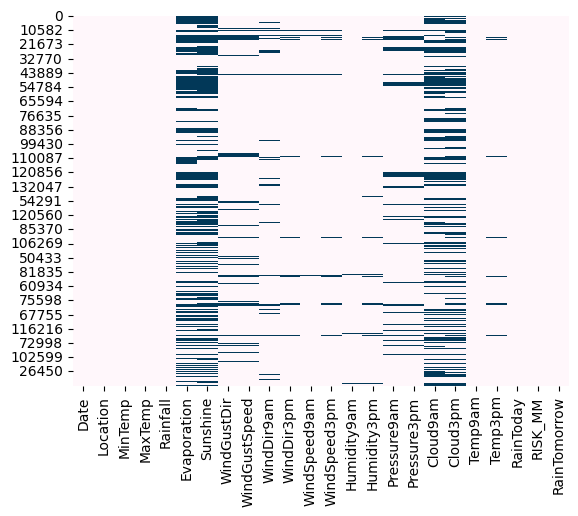

In [28]:
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [29]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Sunshine,104622,0.474192
Evaporation,95154,0.431279
Cloud3pm,85398,0.387061
Cloud9am,81082,0.367499
Pressure9am,21580,0.097810
Pressure3pm,21553,0.097688
WindGustDir,15363,0.069632
WindGustSpeed,15258,0.069156
WindDir9am,14732,0.066772
WindDir3pm,6348,0.028772


In [30]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [31]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
catagorical=oversampled.select_dtypes(include=['object']).columns
for i in catagorical:
  oversampled[i]=le.fit_transform(oversampled[i])


In [33]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 82845
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           220632 non-null  int64  
 1   Location       220632 non-null  int64  
 2   MinTemp        219576 non-null  float64
 3   MaxTemp        220165 non-null  float64
 4   Rainfall       217560 non-null  float64
 5   Evaporation    125478 non-null  float64
 6   Sunshine       116010 non-null  float64
 7   WindGustDir    220632 non-null  int64  
 8   WindGustSpeed  205374 non-null  float64
 9   WindDir9am     220632 non-null  int64  
 10  WindDir3pm     220632 non-null  int64  
 11  WindSpeed9am   218410 non-null  float64
 12  WindSpeed3pm   216299 non-null  float64
 13  Humidity9am    217551 non-null  float64
 14  Humidity3pm    214687 non-null  float64
 15  Pressure9am    199052 non-null  float64
 16  Pressure3pm    199079 non-null  float64
 17  Cloud9am       139550 non-null  flo

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)


In [35]:
MiceImputed.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [85]:
MiceImputed

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,5.742999,7.322761,13,44.0,13,...,22.0,1007.7,1007.1,8.000000,4.863345,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,5.657643,11.486923,14,44.0,6,...,25.0,1010.6,1007.8,1.702789,2.613555,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,7.752527,12.263609,15,46.0,13,...,30.0,1007.6,1008.7,1.790638,2.000000,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,5.963211,11.731815,4,24.0,9,...,16.0,1017.6,1012.8,1.219932,2.138565,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,6.887374,5.764837,13,41.0,1,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89370,1927,14,15.9,22.2,2.6,4.131812,5.172960,8,52.0,8,...,71.0,1028.6,1025.8,5.522737,5.782953,20.3,21.3,1.0,6.8,1
83230,1792,7,18.9,29.6,0.0,5.400000,8.800000,0,37.0,10,...,51.0,1011.0,1010.7,2.000000,7.000000,27.0,25.5,0.0,8.2,1
5569,3048,4,7.9,17.9,0.0,1.195138,4.364265,8,17.0,12,...,72.0,1025.8,1021.7,5.256673,5.842583,13.5,17.5,0.0,9.8,1
77642,2318,44,8.3,17.9,1.4,1.200000,5.200000,3,28.0,1,...,68.0,1024.4,1023.4,6.000000,6.000000,10.8,16.6,1.0,4.6,1


In [88]:
MiceImputed.iloc[34059]

,50018
Date,2680.000000
Location,40.000000
MinTemp,1.900000
MaxTemp,10.200000
Rainfall,1.000000
Evaporation,4.354246
Sunshine,7.091660
WindGustDir,10.000000
WindGustSpeed,52.000000
WindDir9am,8.000000


In [90]:
rain_tomorrow_yes = MiceImputed[MiceImputed['RainTomorrow'] == 1]
columns_to_show = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                   'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                   'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
                   'RISK_MM','RainTomorrow']
display(rain_tomorrow_yes[columns_to_show].head())

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RISK_MM,RainTomorrow
34059,17.2,0.0,2.000000,9.500000,7,24.0,64.0,42.0,1026.7,1023.9,1.000000,1.000000,16.4,0.0,2.8,1
11835,22.6,0.1,5.107904,7.086964,11,37.0,68.0,63.0,1025.1,1023.1,4.654872,4.000000,21.1,0.0,1.8,1
130944,23.6,0.0,4.290276,7.493645,4,43.0,60.0,45.0,1018.8,1013.4,3.749442,4.444760,22.4,0.0,10.4,1
133656,38.5,0.0,11.000000,12.400000,13,70.0,44.0,28.0,1005.4,999.8,4.000000,7.000000,37.1,0.0,4.8,1
58972,19.4,0.2,1.027375,6.818246,5,28.0,82.0,46.0,1030.4,1024.4,3.626345,4.415436,18.9,0.0,8.0,1


In [36]:
MiceImputed.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,...,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,1920.094397,23.710663,12.547005,22.486548,3.695824,4.813437,6.322690,8.236008,41.893824,7.107292,...,57.701258,1016.580367,1014.292753,4.976653,5.146152,16.849034,20.830709,0.310845,5.153864,0.500000
std,885.916007,14.184845,6.390568,7.108430,11.056003,3.502762,3.668198,4.639494,14.531528,4.488354,...,21.755411,7.008623,6.952936,2.493439,2.328232,6.476739,6.986011,0.460164,12.076705,0.500001
min,0.000000,0.000000,-11.020215,-4.800000,-7.661154,-4.219509,-6.564578,0.000000,6.000000,0.000000,...,-64.486191,980.500000,977.100000,-2.737360,-1.197097,-7.200000,-5.400000,-0.450357,0.000000,0.000000
25%,1153.000000,11.000000,8.000000,17.200000,0.000000,2.436117,3.360835,4.000000,31.000000,3.000000,...,43.000000,1012.200000,1009.800000,3.000000,3.324692,12.100000,15.700000,0.000000,0.000000,0.000000
50%,1934.000000,24.000000,12.300000,21.800000,0.000000,4.400000,6.364000,9.000000,39.000000,7.000000,...,59.000000,1016.700000,1014.400000,5.589053,5.680618,16.500000,20.200000,0.000000,1.050000,0.500000
75%,2691.000000,36.000000,17.200000,27.400000,2.400000,6.520493,9.255186,13.000000,50.000000,11.000000,...,73.000000,1020.905941,1018.600000,7.000000,7.000000,21.400000,25.500000,1.000000,5.200000,1.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,18.176255,15.000000,141.178965,15.000000,...,134.053337,1041.000000,1039.600000,10.006002,11.579144,40.200000,46.700000,1.552272,371.000000,1.000000


In [37]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1538.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.084375
Sunshine            5.894351
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.705941
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.675308
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [38]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156979, 24)

In [39]:
MiceImputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156979 entries, 0 to 82845
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           156979 non-null  int64  
 1   Location       156979 non-null  int64  
 2   MinTemp        156979 non-null  float64
 3   MaxTemp        156979 non-null  float64
 4   Rainfall       156979 non-null  float64
 5   Evaporation    156979 non-null  float64
 6   Sunshine       156979 non-null  float64
 7   WindGustDir    156979 non-null  int64  
 8   WindGustSpeed  156979 non-null  float64
 9   WindDir9am     156979 non-null  int64  
 10  WindDir3pm     156979 non-null  int64  
 11  WindSpeed9am   156979 non-null  float64
 12  WindSpeed3pm   156979 non-null  float64
 13  Humidity9am    156979 non-null  float64
 14  Humidity3pm    156979 non-null  float64
 15  Pressure9am    156979 non-null  float64
 16  Pressure3pm    156979 non-null  float64
 17  Cloud9am       156979 non-null  flo

<Axes: >

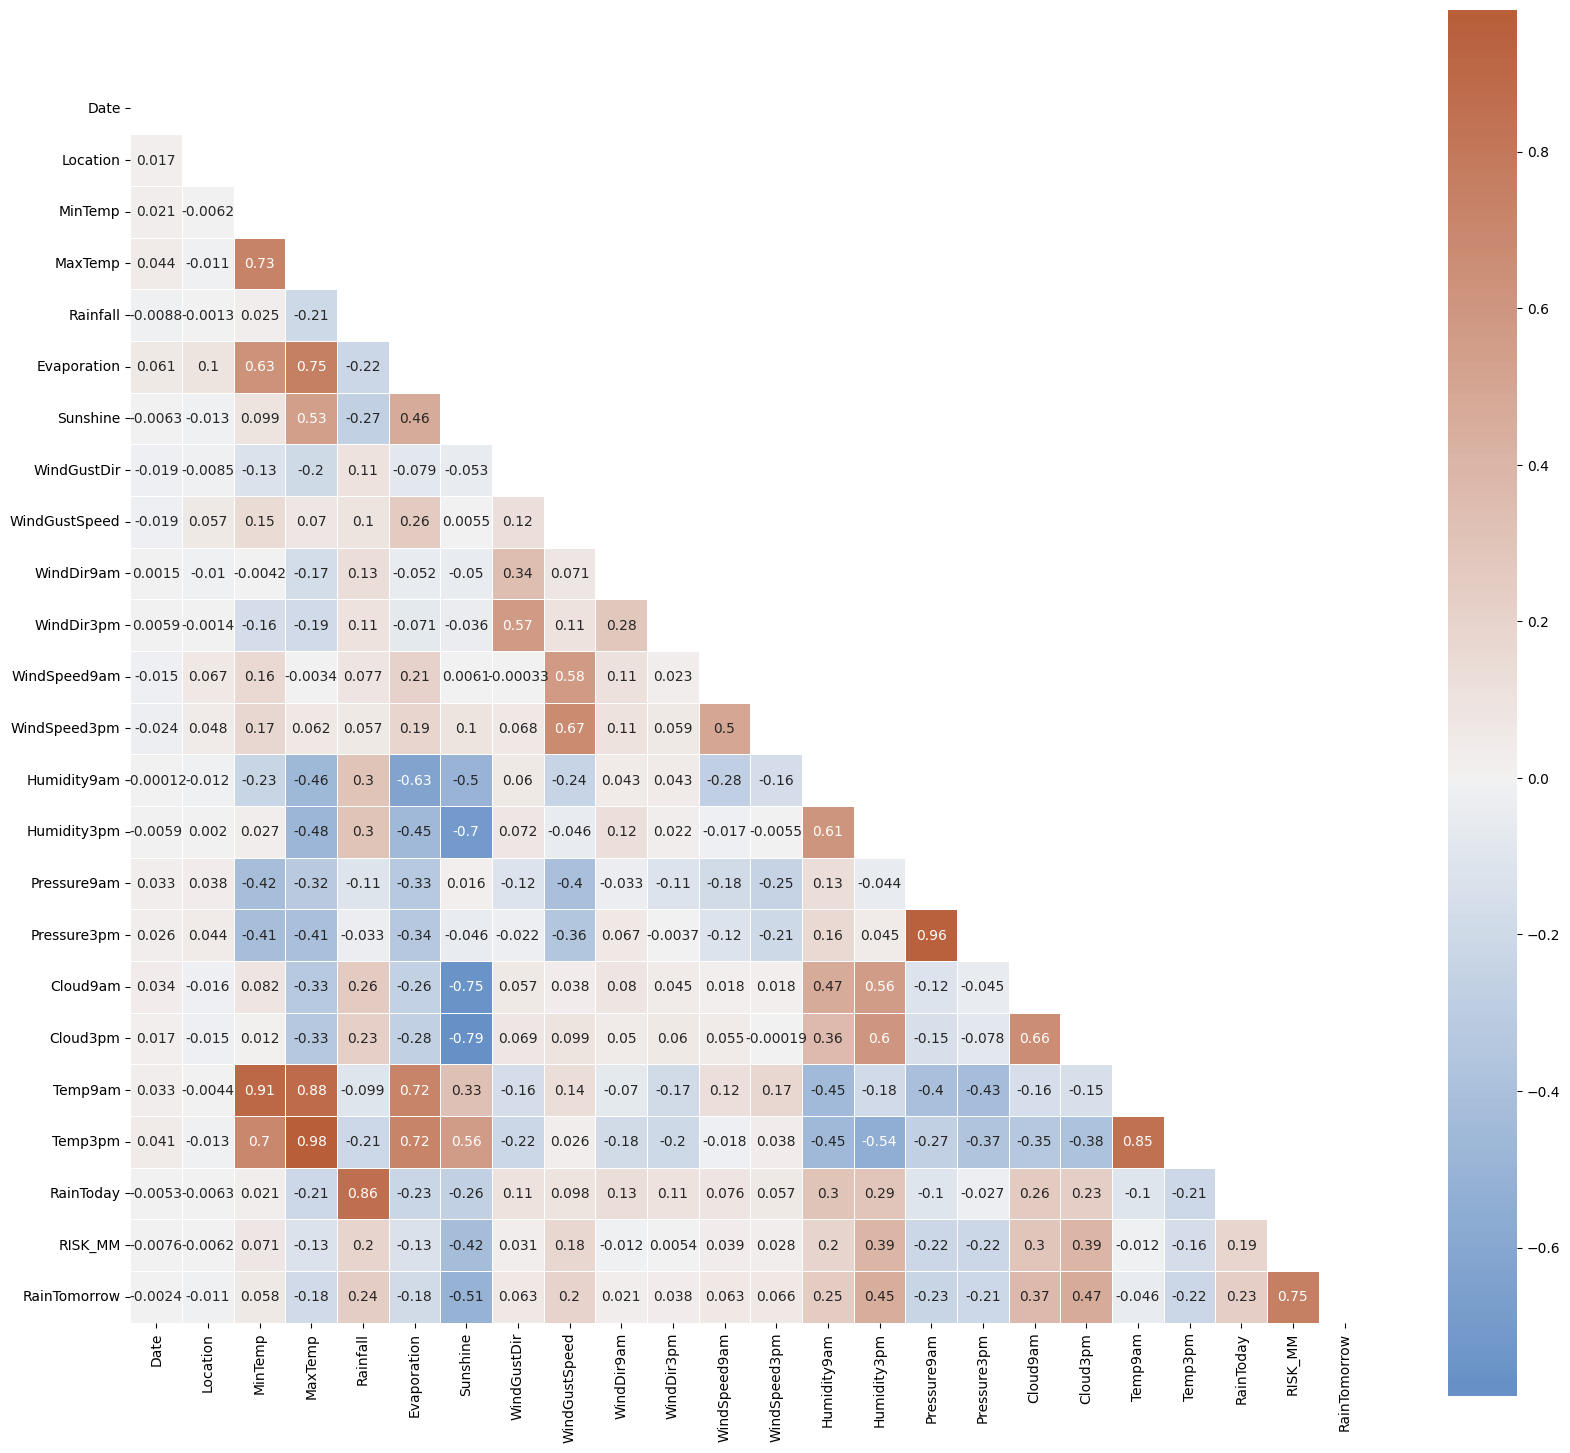

In [40]:
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [41]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

Output hidden; open in https://colab.research.google.com to view.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(MiceImputed)
modified_data = pd.DataFrame(scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [43]:
modified_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.539548,0.514778,0.435037,0.573687,0.503295,0.866667,0.521127,0.866667,...,0.220823,0.244957,0.298295,0.865019,0.420009,0.507011,0.530612,0.245825,0.000000,0.0
1,0.115575,0.041667,0.370056,0.568966,0.372264,0.568413,0.745348,0.933333,0.521127,0.400000,...,0.250791,0.328530,0.318182,0.336234,0.225712,0.515137,0.594388,0.245825,0.000000,0.0
2,0.115866,0.041667,0.525424,0.583744,0.372264,0.697853,0.790494,1.000000,0.549296,0.866667,...,0.300739,0.242075,0.343750,0.343611,0.172724,0.618069,0.566327,0.245825,0.000000,0.0
3,0.116157,0.041667,0.420904,0.640394,0.372264,0.587294,0.759582,0.266667,0.239437,0.600000,...,0.160886,0.530259,0.460227,0.295688,0.184691,0.539516,0.650510,0.245825,0.076923,0.0
4,0.116448,0.041667,0.655367,0.746305,0.476886,0.644397,0.412737,0.866667,0.478873,0.066667,...,0.330707,0.334294,0.267045,0.781047,0.690897,0.531389,0.732143,0.245825,0.015385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89370,0.560990,0.291667,0.610169,0.497537,0.644283,0.474134,0.378333,0.533333,0.633803,0.533333,...,0.710306,0.847262,0.829545,0.657000,0.499428,0.599108,0.517857,1.000000,0.523077,1.0
83230,0.521689,0.145833,0.694915,0.679803,0.372264,0.552494,0.589164,0.000000,0.422535,0.666667,...,0.510517,0.340058,0.400568,0.361191,0.604535,0.780593,0.625000,0.245825,0.630769,1.0
5569,0.887336,0.083333,0.384181,0.391626,0.372264,0.292681,0.331326,0.533333,0.140845,0.800000,...,0.720295,0.766571,0.713068,0.634658,0.504578,0.414914,0.420918,0.245825,0.753846,1.0
77642,0.674818,0.916667,0.395480,0.391626,0.518736,0.292982,0.379905,0.200000,0.295775,0.066667,...,0.680338,0.726225,0.761364,0.697076,0.518173,0.341778,0.397959,1.000000,0.353846,1.0


In [44]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=15)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [45]:
features = modified_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = modified_data['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [46]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [47]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    plt.show()


    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7855013377500318
ROC Area under Curve = 0.7662499727494653
Cohen's Kappa = 0.5422848781776346
Time taken = 18.445987701416016
              precision    recall  f1-score   support

         0.0    0.80306   0.85648   0.82891     23809
         1.0    0.75332   0.67602   0.71258     15436

    accuracy                        0.78550     39245
   macro avg    0.77819   0.76625   0.77074     39245
weighted avg    0.78349   0.78550   0.78315     39245



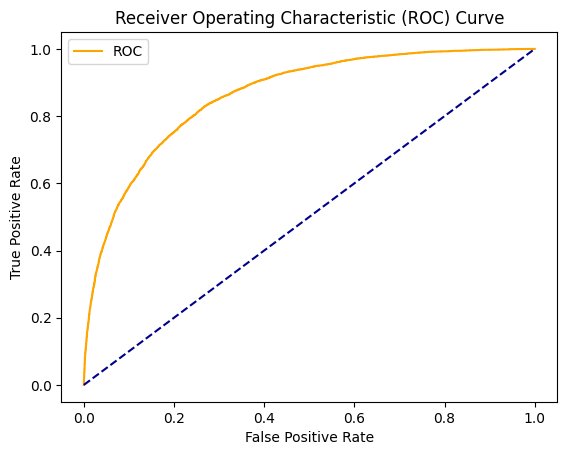

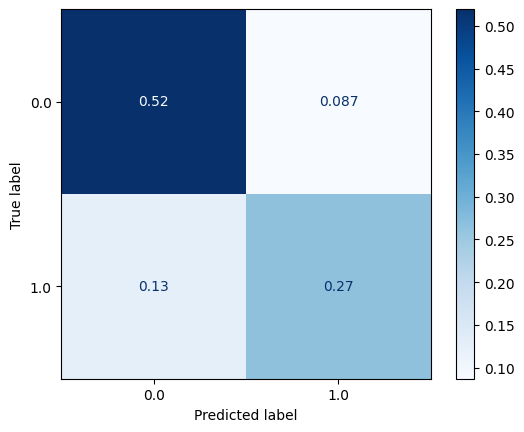

In [48]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


Accuracy = 0.8370493056440311
ROC Area under Curve = 0.8394449852164693
Cohen's Kappa = 0.6653608172833476
Time taken = 25.996995210647583
              precision    recall  f1-score   support

         0.0    0.89534   0.82822   0.86047     23809
         1.0    0.76250   0.85067   0.80418     15436

    accuracy                        0.83705     39245
   macro avg    0.82892   0.83944   0.83232     39245
weighted avg    0.84309   0.83705   0.83833     39245



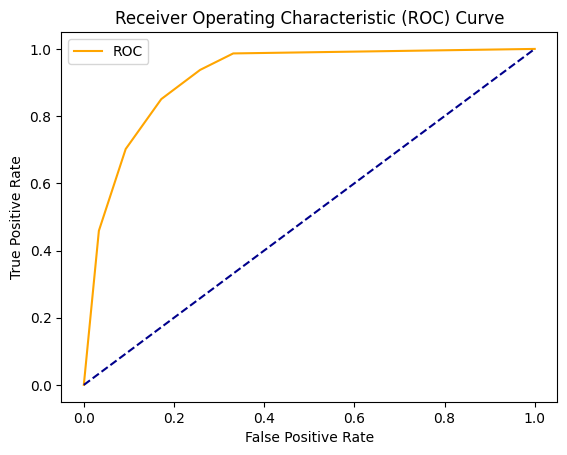

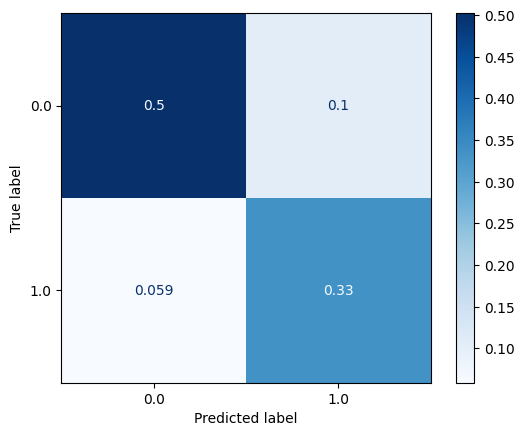

In [49]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {'n_neighbors': 5}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(model_knn, X_train, y_train, X_test, y_test)

Accuracy = 0.7772964708880112
ROC Area under Curve = 0.7683958591660149
Cohen's Kappa = 0.5349513852629886
Time taken = 0.6498117446899414
              precision    recall  f1-score   support

         0.0    0.82052   0.81011   0.81528     23809
         1.0    0.71273   0.72668   0.71964     15436

    accuracy                        0.77730     39245
   macro avg    0.76663   0.76840   0.76746     39245
weighted avg    0.77813   0.77730   0.77766     39245



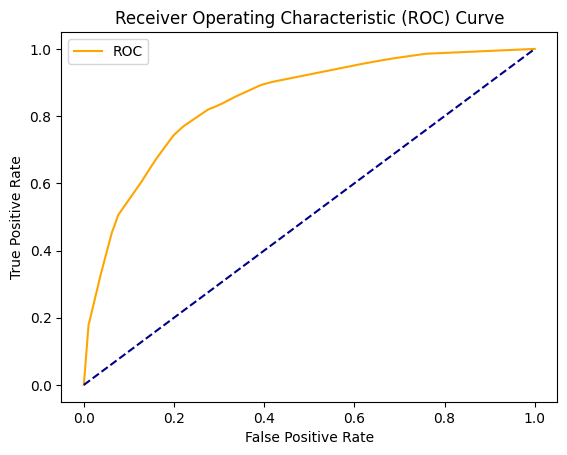

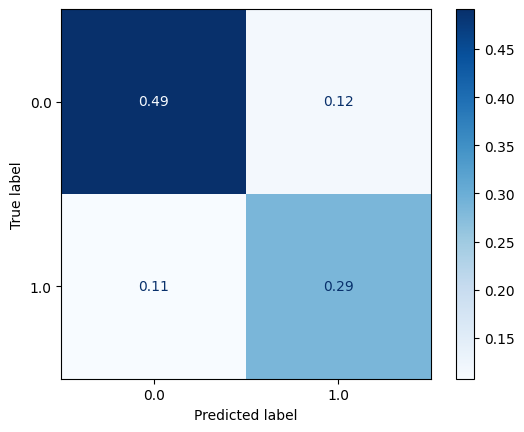

In [50]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 5}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.783641228181934
ROC Area under Curve = 0.7642498936997864
Cohen's Kappa = 0.5382674136907797
Time taken = 9.980071067810059
              precision    recall  f1-score   support

         0.0    0.80151   0.85514   0.82746     23809
         1.0    0.75085   0.67336   0.71000     15436

    accuracy                        0.78364     39245
   macro avg    0.77618   0.76425   0.76873     39245
weighted avg    0.78158   0.78364   0.78126     39245



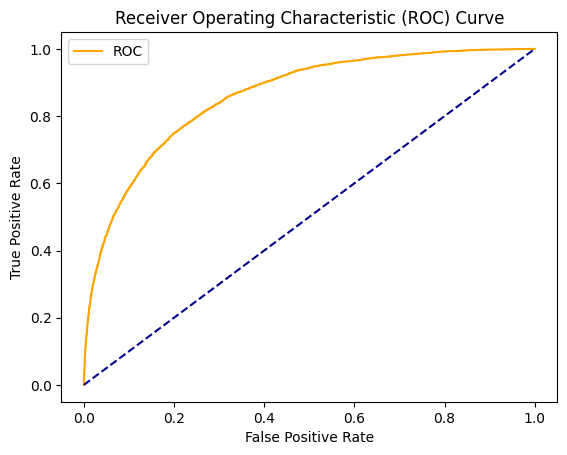

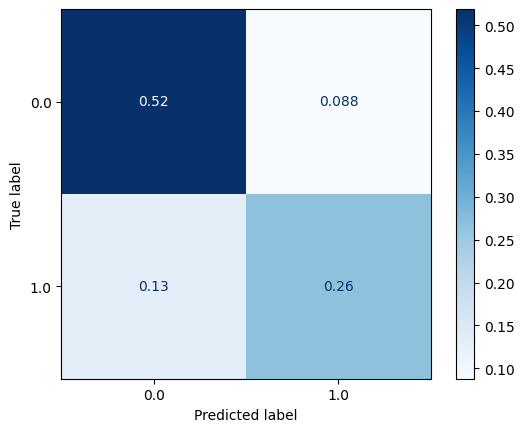

In [51]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'n_estimators': 100, 'max_depth': 5}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8343483246273411
ROC Area under Curve = 0.8214533087569336
Cohen's Kappa = 0.6493942041755467
Time taken = 66.9465081691742
              precision    recall  f1-score   support

         0.0    0.85056   0.88189   0.86594     23809
         1.0    0.80685   0.76101   0.78326     15436

    accuracy                        0.83435     39245
   macro avg    0.82871   0.82145   0.82460     39245
weighted avg    0.83337   0.83435   0.83342     39245



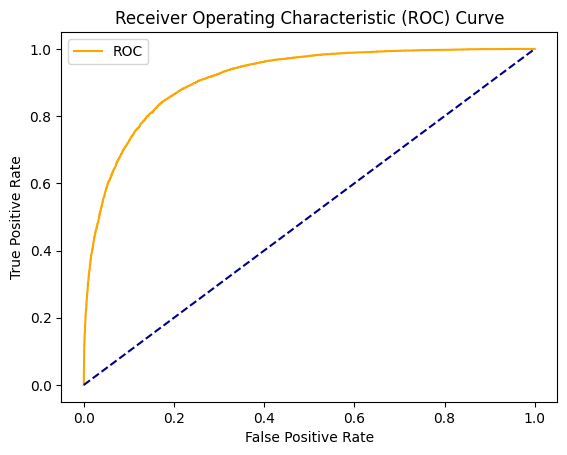

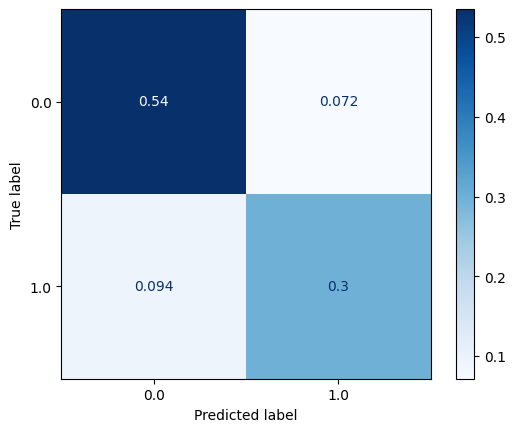

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

params_gb = {'n_estimators': 100, 'max_depth': 5}

model_gb = GradientBoostingClassifier(**params_gb)
model_gb, accuracy_gb, roc_auc_gb, coh_kap_gb, tt_gb = run_model(model_gb, X_train, y_train, X_test, y_test)



In [53]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
from sklearn.model_selection import cross_validate, KFold
fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_lr, X_train, y_train, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 0.7910
Decision_Tree_Classifier using kfold (precision): 0.7615
Decision_Tree_Classifier using kfold (recall): 0.6851
Decision_Tree_Classifier using kfold (f1): 0.7205


In [54]:
from sklearn.neighbors import KNeighborsClassifier
params_knn = {'n_neighbors': 5}
model_knn = KNeighborsClassifier(**params_knn)
from sklearn.model_selection import cross_validate, KFold
fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_knn, X_train, y_train, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 0.8277
Decision_Tree_Classifier using kfold (precision): 0.7595
Decision_Tree_Classifier using kfold (recall): 0.8288
Decision_Tree_Classifier using kfold (f1): 0.7901


In [55]:
from sklearn.model_selection import cross_validate, KFold

fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_dt, X_train, y_train, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 0.7840
Decision_Tree_Classifier using kfold (precision): 0.7194
Decision_Tree_Classifier using kfold (recall): 0.7402
Decision_Tree_Classifier using kfold (f1): 0.7275


In [56]:
from sklearn.ensemble import RandomForestClassifier
params_rf = {'n_estimators': 100, 'max_depth': 5}
model_rf = RandomForestClassifier(**params_rf)
from sklearn.model_selection import cross_validate, KFold
fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_rf, X_train, y_train, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 0.7910
Decision_Tree_Classifier using kfold (precision): 0.7615
Decision_Tree_Classifier using kfold (recall): 0.6850
Decision_Tree_Classifier using kfold (f1): 0.7177


In [57]:
features = modified_data[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                          'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                          'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
                          'RISK_MM']]
target = modified_data['RainTomorrow']
from sklearn.model_selection import train_test_split
X_trainm, X_testm, y_trainm, y_testm = train_test_split(features, target, test_size=0.25, random_state=12345)

In [65]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def run_model(model, X_trainm, y_trainm, X_testm, y_testm, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_trainm,y_trainm, verbose=0)

    else:
        model.fit(X_trainm,y_trainm)
    y_pred = model.predict(X_testm)
    accuracy = accuracy_score(y_testm, y_pred)
    roc_auc = roc_auc_score(y_testm, y_pred)
    coh_kap = cohen_kappa_score(y_testm, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))

    return model, accuracy, roc_auc, coh_kap, time_taken

In [77]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr.fit(X_trainm, y_trainm)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_trainm, y_trainm, X_testm, y_testm)

Accuracy = 1.0
ROC Area under Curve = 1.0
Cohen's Kappa = 1.0
Time taken = 7.156977415084839


In [79]:
import pickle
from google.colab import files
with open('rainfall_model.pkl', 'wb') as file:
    pickle.dump(model_lr, file)
    files.download('rainfall_model.pkl')


print("✅ Model saved successfully as rainfall_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model saved successfully as rainfall_model.pkl


In [67]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
from sklearn.model_selection import cross_validate, KFold
fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_lr, X_trainm, y_trainm, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 1.0000
Decision_Tree_Classifier using kfold (precision): 1.0000
Decision_Tree_Classifier using kfold (recall): 1.0000
Decision_Tree_Classifier using kfold (f1): 1.0000


In [68]:
from sklearn.ensemble import RandomForestClassifier
params_rf = {'n_estimators': 100, 'max_depth': 5}
model_rf = RandomForestClassifier(**params_rf)
from sklearn.model_selection import cross_validate, KFold
fold = 5
kf = KFold(n_splits=fold, shuffle=True, random_state=42)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model_rf, X_trainm, y_trainm, cv=kf, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"Decision_Tree_Classifier using kfold ({metric}): {scores['test_' + metric].max():.4f}")

Decision_Tree_Classifier using kfold (accuracy): 1.0000
Decision_Tree_Classifier using kfold (precision): 1.0000
Decision_Tree_Classifier using kfold (recall): 1.0000
Decision_Tree_Classifier using kfold (f1): 1.0000
